## I will be working with credit card dataset. This dataset is about fraud cases and almost 30 variables. 

## The point of this analysis is to reduced false negatives as much as I can. False negatives are credit card scammers who got away. The model prediced them as negative but in reality they are scammers

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif 
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

df = pd.read_csv("credit.csv")

In [30]:
df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

## Below you can see that there are 492 fraud cases 

In [31]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: ylabel='count'>

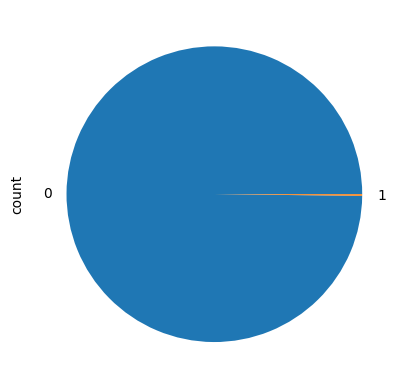

In [32]:
df['Class'].value_counts().plot(kind='pie')

## Since there is dataset imbalance. I will try to statify and ill use sampling

## Since there are soo many dimensions/variables I beleive that LDA linear discrimiminet analysis will be good use in this modeling

## Lets first scale the features so that some variables with high variance don't have a lot of influence 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
from sklearn.preprocessing import MinMaxScaler
# Initialize the Min-Max Scaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)


# Apply PCA
pca = PCA(n_components=0.95)  # Adjust n_components based on your dataset
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=10, verbose=True)
catboost_model.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
predictions = catboost_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f'Accuracy: {accuracy}')


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()

print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")


True Negatives (TN): 56858
False Positives (FP): 6
False Negatives (FN): 21
True Positives (TP): 77


## False negatives are still not where I want them to be 

## lets rebalance th dataset then run the model on it 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Class' is the target variable

# Split the data into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Rebalance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features using Min-Max Scaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_resampled)
X_test_scaled = min_max_scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a CatBoost Classifier
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=10, verbose=False)
catboost_model.fit(X_train_pca, y_train_resampled)

# Make predictions and evaluate the model
predictions = catboost_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f'Accuracy: {accuracy}')




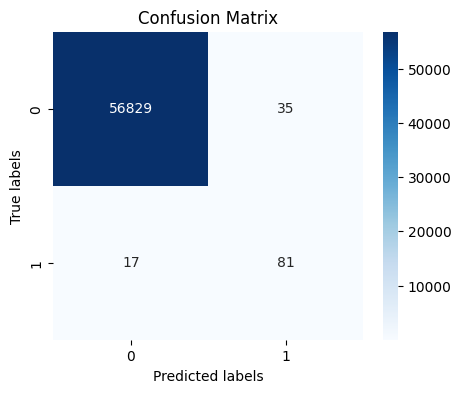

In [56]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 56829
False Positives (FP): 35
False Negatives (FN): 17
True Positives (TP): 81


## this is honestly great because we further reduced false negatives.

## Now I'll try regularized logistic regression

Accuracy: 0.9986306660580738


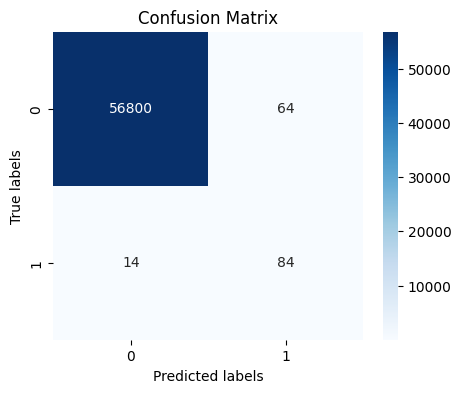

In [57]:
# Adjust CatBoost Classifier to include L2 regularization
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=10,
    l2_leaf_reg=10,  # Increase L2 regularization strength
    verbose=False
)

# Everything else remains the same
catboost_model.fit(X_train_pca, y_train_resampled)

# Make predictions and evaluate the model
predictions = catboost_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f'Accuracy: {accuracy}')

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 56800
False Positives (FP): 64
False Negatives (FN): 14
True Positives (TP): 84


# Yay more scammers caught without much increaseing false positives !!!!!!!!!!

## lets try less regularization, more iterations and less learning rate

In [ ]:
# Adjust CatBoost Classifier to include L2 regularization
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=5,
    l2_leaf_reg=15, 
    verbose=False
)
catboost_model.fit(X_train_pca, y_train_resampled)
predictions = catboost_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f'Accuracy: {accuracy}')

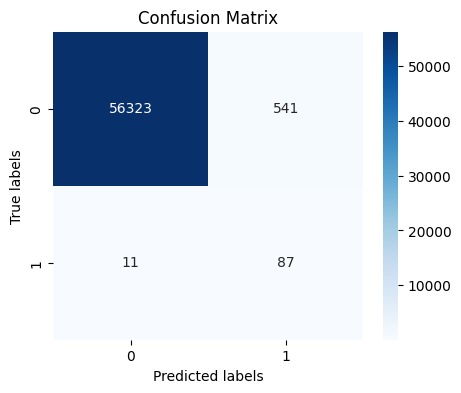

In [69]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
TN, FP, FN, TP = cm.ravel()
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

True Negatives (TN): 56323
False Positives (FP): 541
False Negatives (FN): 11
True Positives (TP): 87


## yay only 11 theive got away

In [71]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Extract False Positives (FP) and False Negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Print False Negatives and False Positives
print(f'False Negatives (FN): {FN}')
print(f'False Positives (FP): {FP}')


False Negatives (FN): 11
False Positives (FP): 637


Accuracy of SVM with SGD: 0.9977353323268143


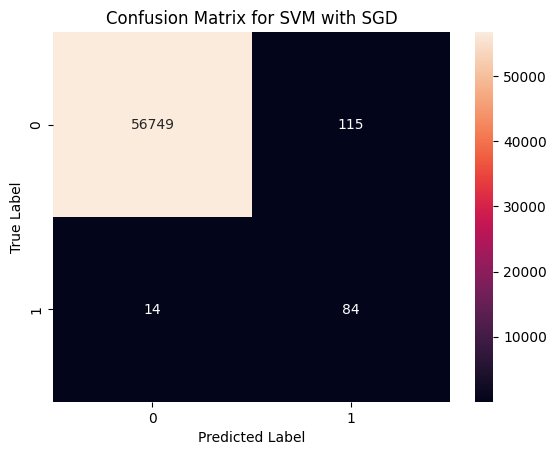

In [27]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA  # If you plan to use PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier  # For SGD optimized classifier
from sklearn.neighbors import KNeighborsClassifier  # For KNN
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Rebalance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the features using Min-Max Scaler
min_max_scaler = MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train_resampled)
X_test_scaled = min_max_scaler.transform(X_test)


svm_sgd_clf = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.001, max_iter=3000, tol=1e-4, random_state=42)

# Fit the model on the training data
svm_sgd_clf.fit(X_train_scaled, y_train_resampled)

# Predict on the test data
y_pred_svm_sgd = svm_sgd_clf.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy_svm_sgd = accuracy_score(y_test, y_pred_svm_sgd)
print("Accuracy of SVM with SGD:", accuracy_svm_sgd)

# Generate and display the confusion matrix
conf_mat_svm_sgd = confusion_matrix(y_test, y_pred_svm_sgd)
sns.heatmap(conf_mat_svm_sgd, annot=True, fmt='d')
plt.title('Confusion Matrix for SVM with SGD')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## Here I will show pairplot for a great visualization. Blue is fraud. Orange is non-fraud.

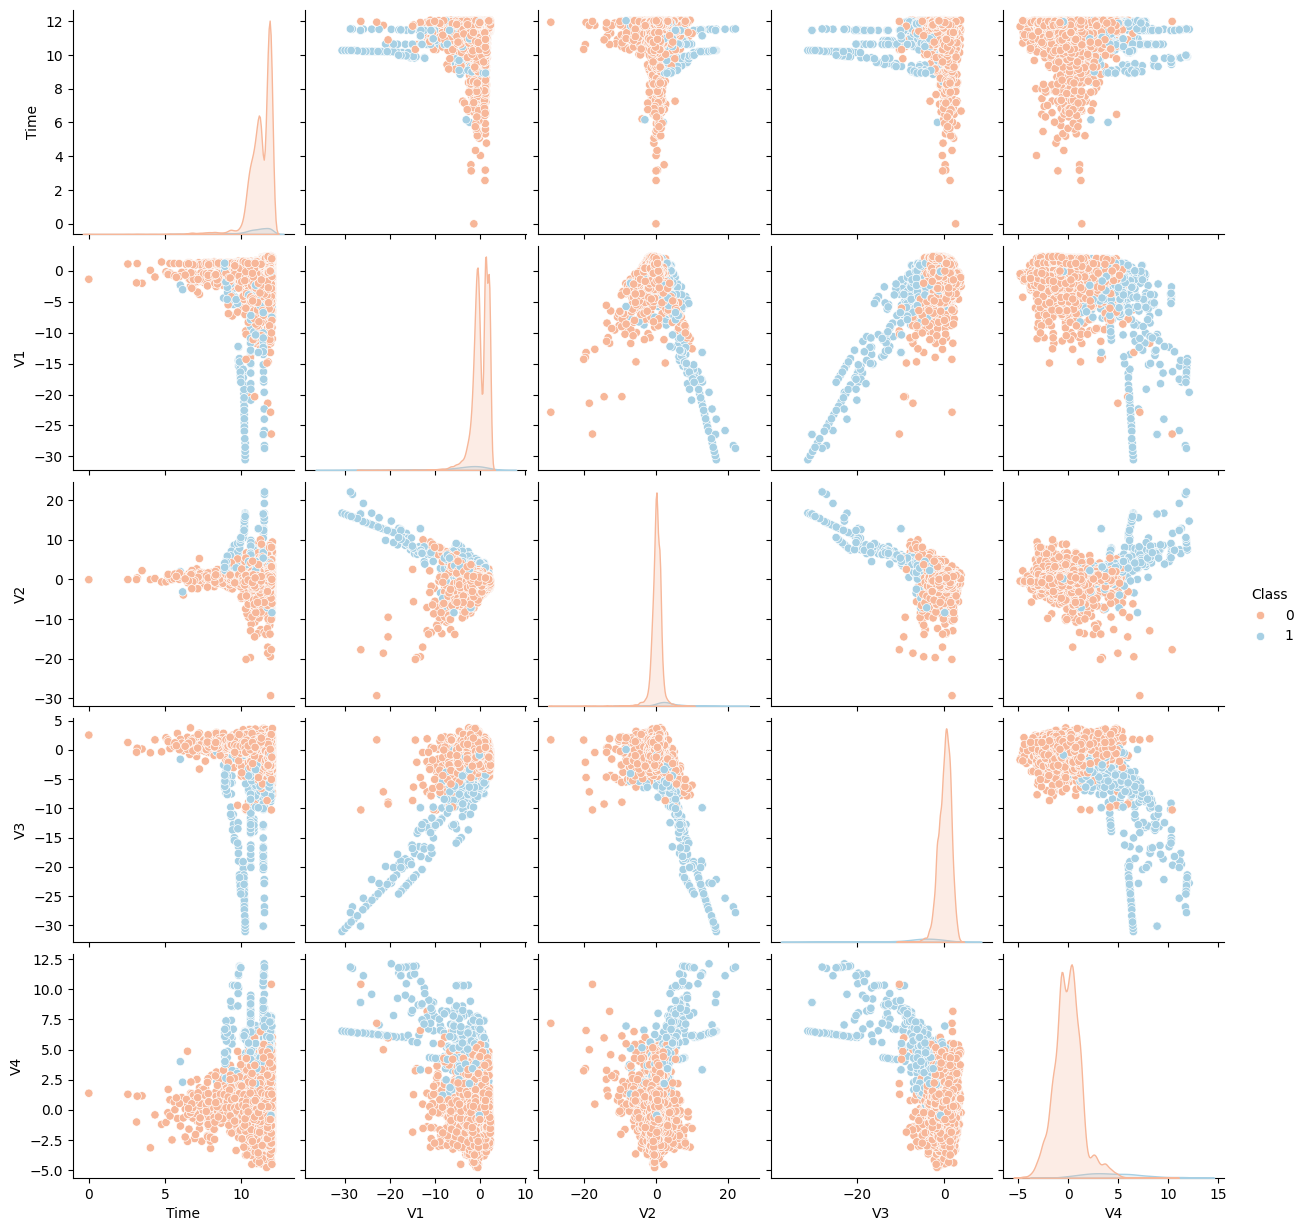

In [12]:

df_subset = df.iloc[:, list(range(5)) + [-1]]

df_class_1 = df_subset[df_subset['Class'] == 1]

sample_size_class_0 = 10000 - len(df_class_1)  

df_class_0_sampled = df_subset[df_subset['Class'] == 0].sample(n=sample_size_class_0, random_state=42)

df_sampled = pd.concat([df_class_1, df_class_0_sampled])

df_sampled = df_sampled.sample(frac=1, random_state=42)

sns.pairplot(data=df_sampled, hue="Class", palette='RdBu')
plt.show()


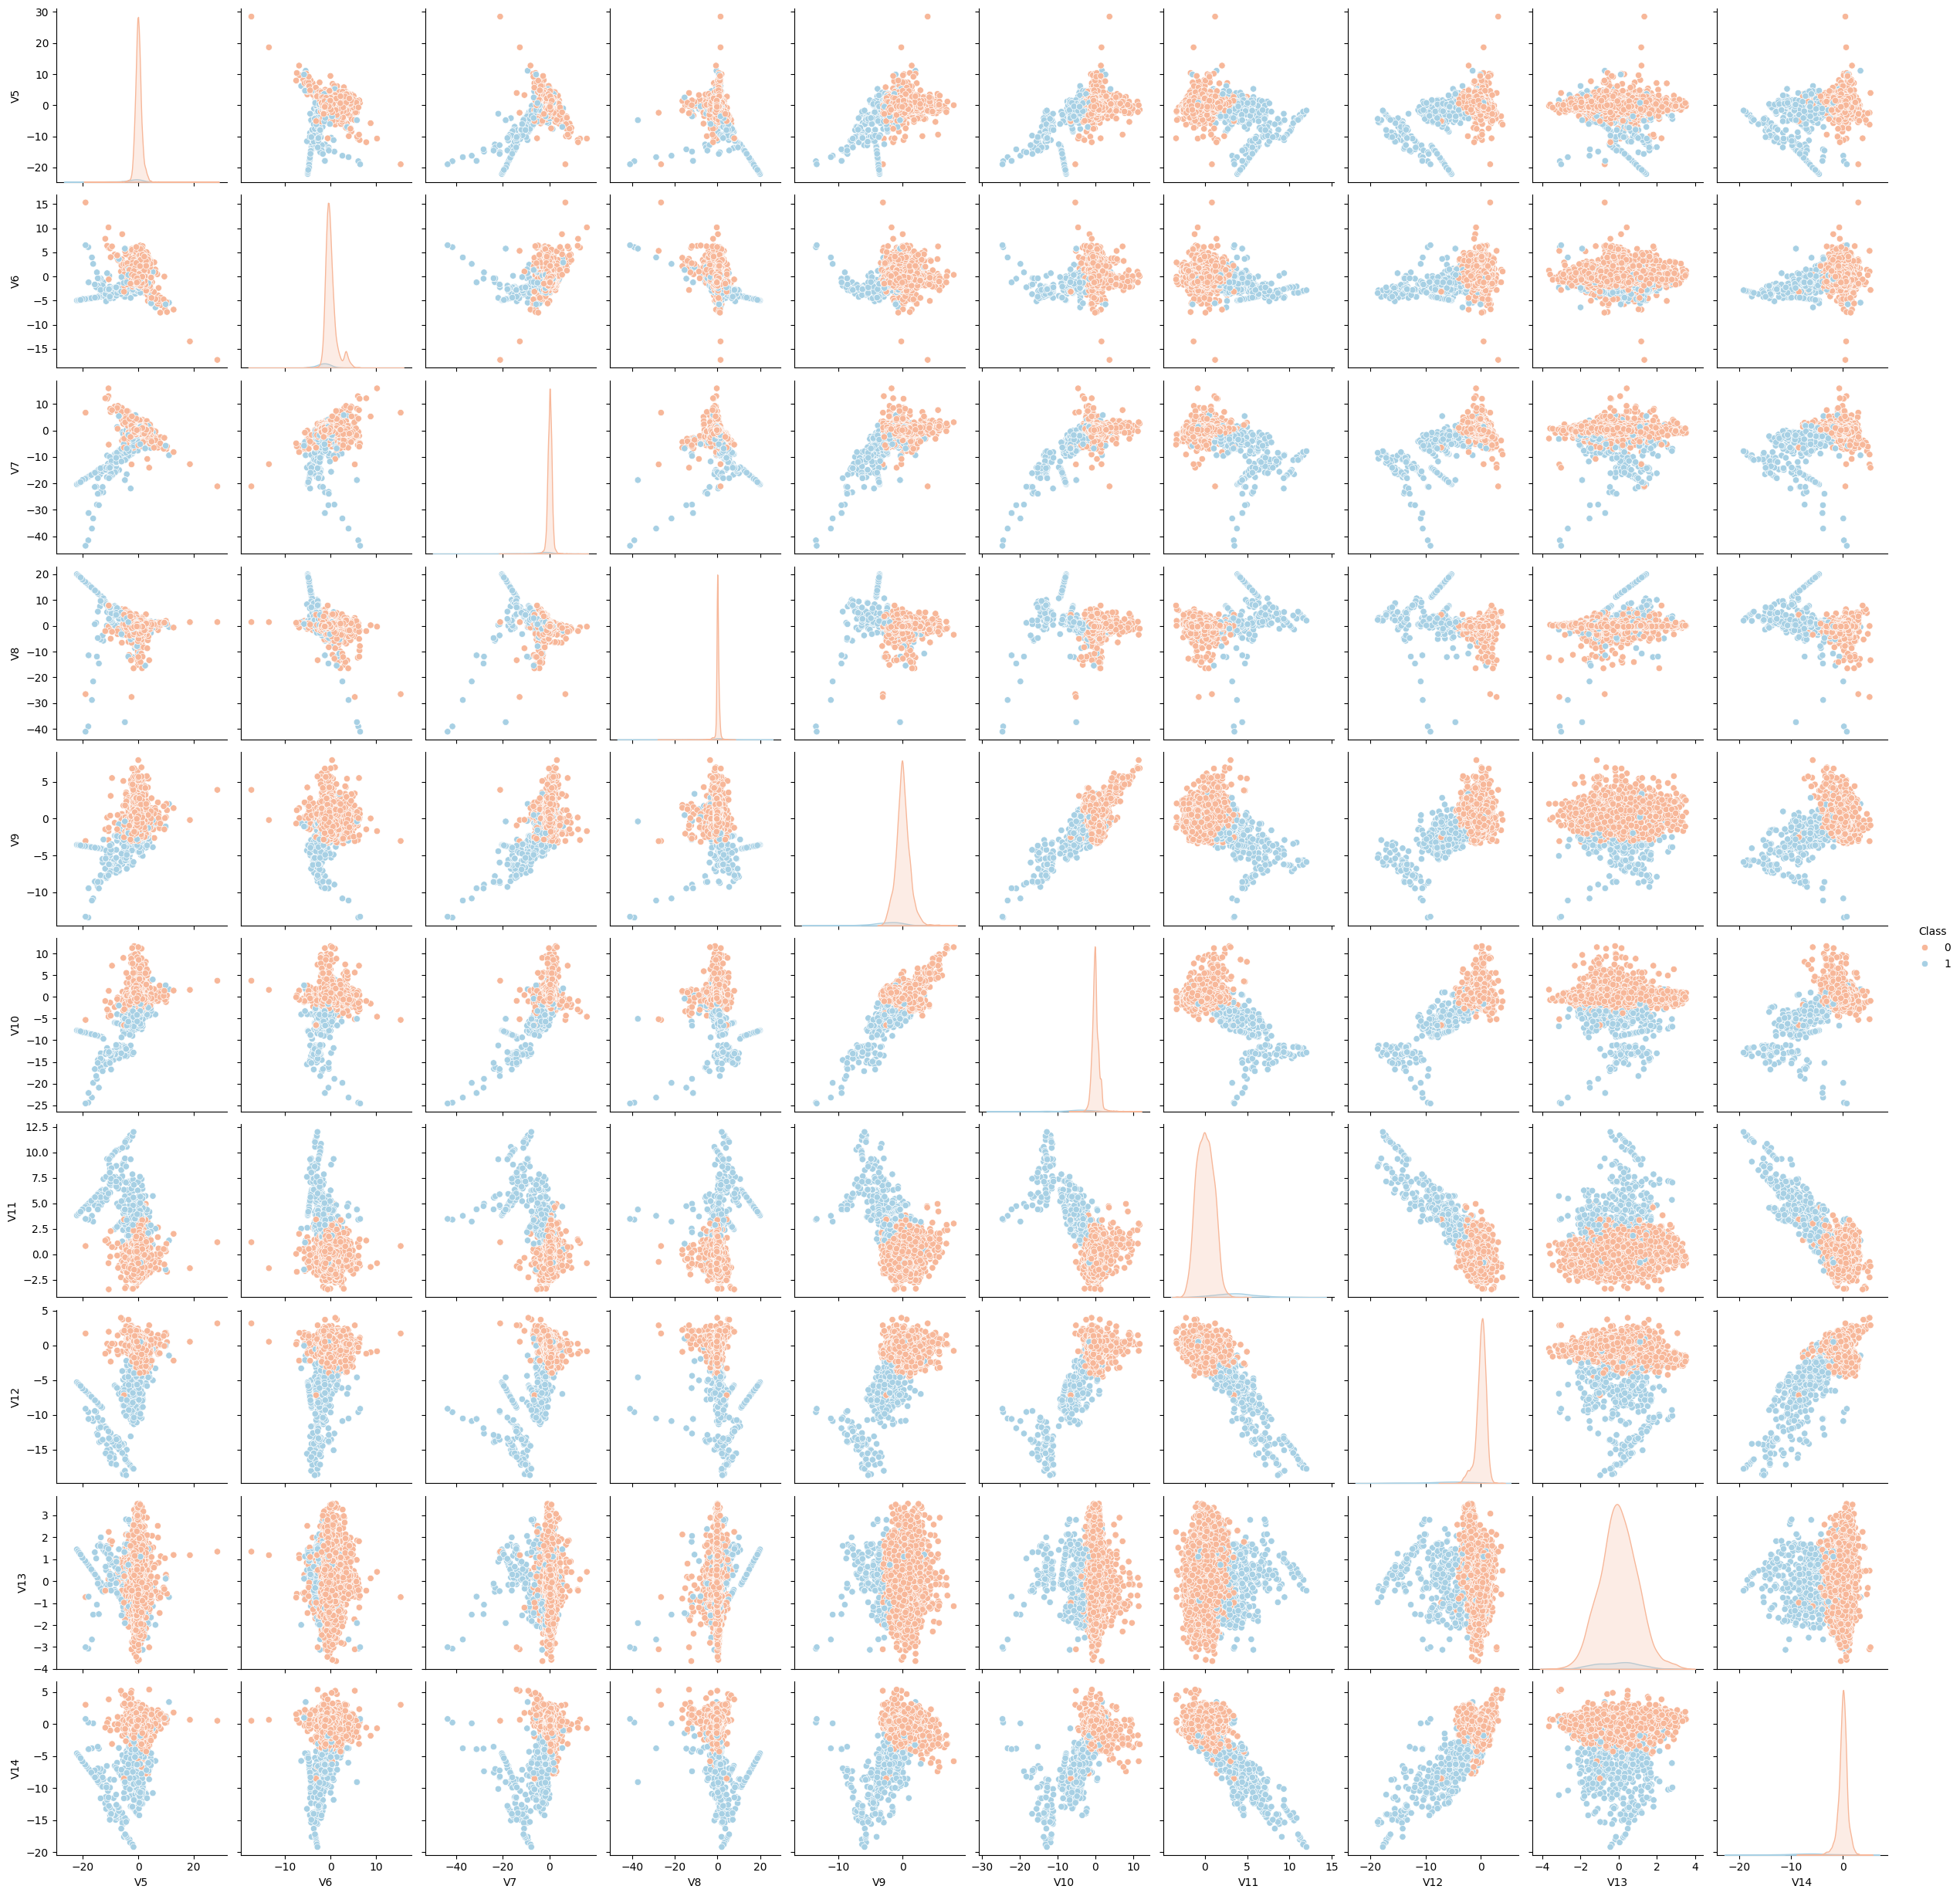

In [14]:

df_subset = df.iloc[:, list(range(5,15)) + [-1]]

df_class_1 = df_subset[df_subset['Class'] == 1]

sample_size_class_0 = 10000 - len(df_class_1)  

df_class_0_sampled = df_subset[df_subset['Class'] == 0].sample(n=sample_size_class_0, random_state=42)

df_sampled = pd.concat([df_class_1, df_class_0_sampled])

df_sampled = df_sampled.sample(frac=1, random_state=42)

sns.pairplot(data=df_sampled, hue="Class", palette='RdBu')
plt.show()


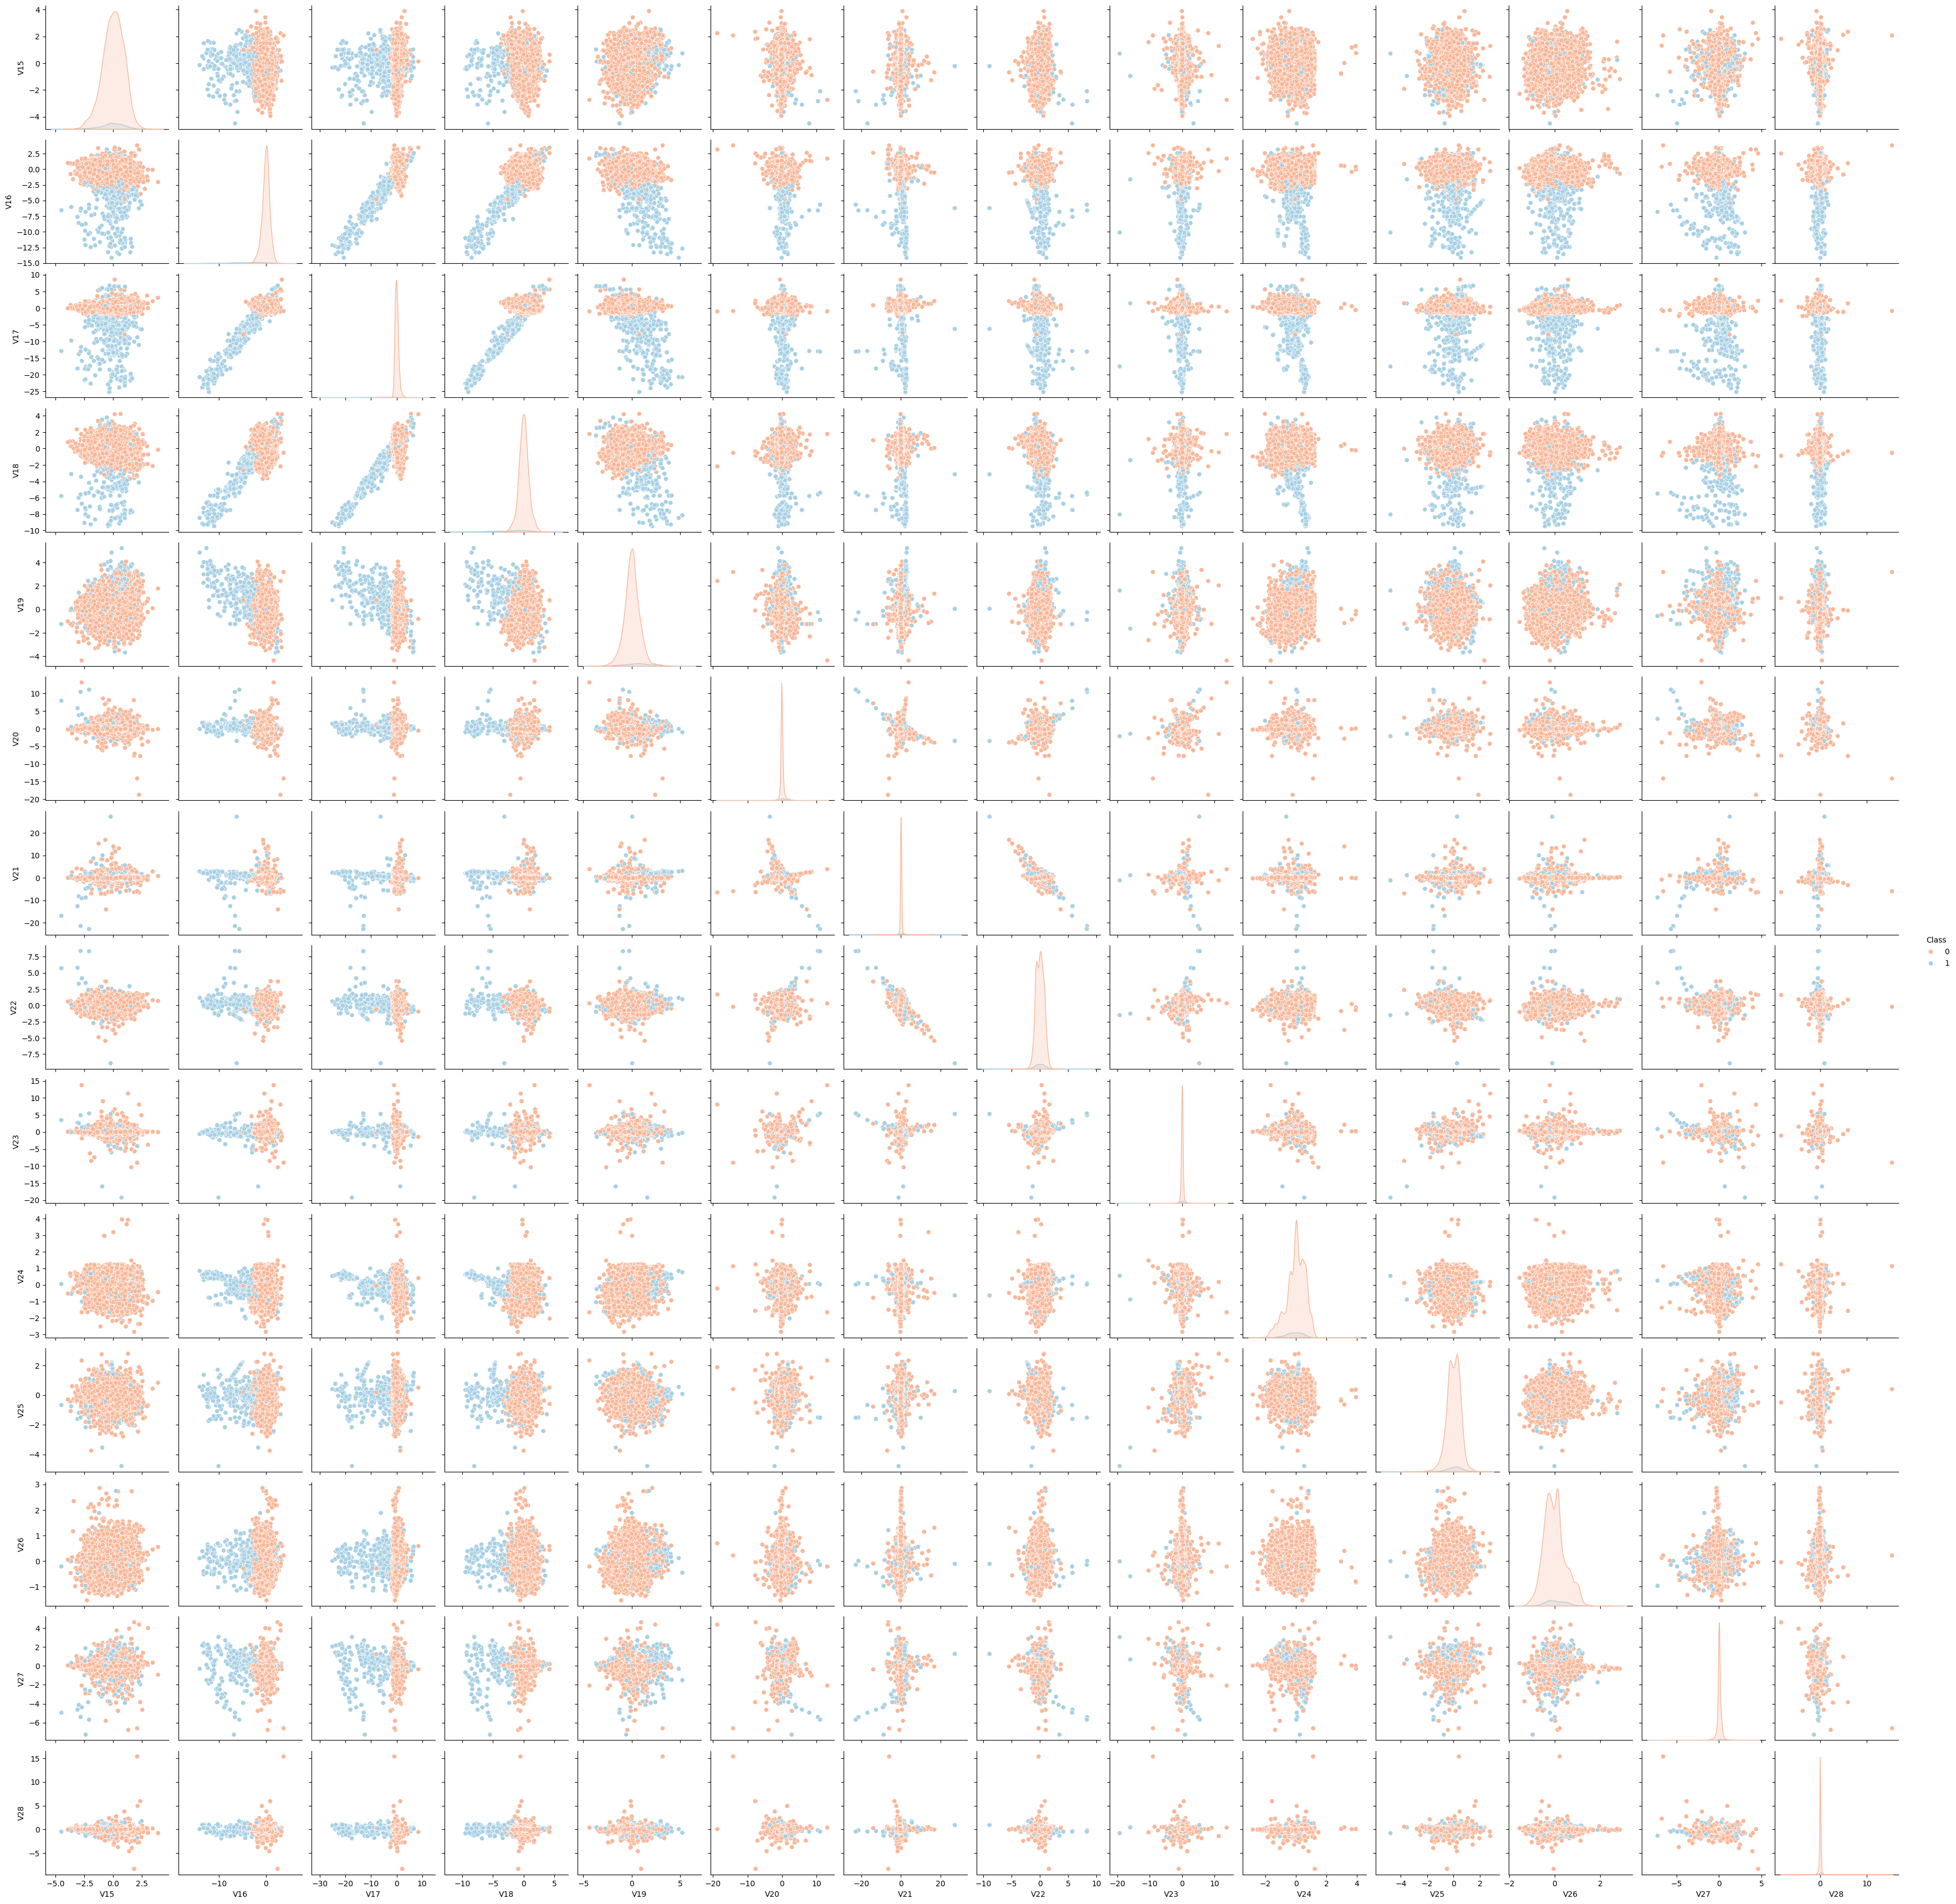

In [15]:
df_subset = df.iloc[:, list(range(15,29)) + [-1]]

df_class_1 = df_subset[df_subset['Class'] == 1]

sample_size_class_0 = 10000 - len(df_class_1)  

df_class_0_sampled = df_subset[df_subset['Class'] == 0].sample(n=sample_size_class_0, random_state=42)

df_sampled = pd.concat([df_class_1, df_class_0_sampled])

df_sampled = df_sampled.sample(frac=1, random_state=42)

sns.pairplot(data=df_sampled, hue="Class", palette='RdBu')
plt.show()


In [17]:
df_sampled['Class'].value_counts()


Class
0    9508
1     492
Name: count, dtype: int64

## I will run algorithm on best two varaibles using F-classifier

## Above you can see that only 18 false negatives

## The below model using catboost reduced false negatives by half

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming your data is in a DataFrame called 'df'
# If your data is in a CSV file, you can load it using pd.read_csv('your_file.csv')

y = df['Class']

X = df.drop(columns=['Class'])

# Feature selection using SelectKBest
X_selected = SelectKBest(score_func=f_classif, k=10).fit_transform(X.copy(), y.copy())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
catboost_model.fit(X_train_scaled, y_train)
y_pred_catboost = catboost_model.predict(X_test_scaled)

# Logistic Regression Classifier
logreg_model = LogisticRegression(random_state=42, max_iter=2000)
logreg_model.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_model.predict(X_test_scaled)

# Evaluate models
evaluate_model(catboost_model, X_test_scaled, y_test, y_pred_catboost)
evaluate_model(logreg_model, X_test_scaled, y_test, y_pred_logreg)


Model: CatBoostClassifier
Accuracy: 0.9995259997893332
Confusion Matrix:
[[56855     9]
 [   18    80]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Model: LogisticRegression
Accuracy: 0.9990871107053826
Confusion Matrix:
[[56854    10]
 [   42    56]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962




In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif


y = df['Class']

X = df.drop(columns=['Class'])
X_selected = SelectKBest(score_func=f_classif, k=10).fit_transform(X.copy(), y.copy())

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# CatBoost Classifier with polynomial features
catboost_model_poly = CatBoostClassifier(random_state=42, verbose=False, max_iter=3000)
catboost_model_poly.fit(X_train_poly, y_train)
y_pred_catboost_poly = catboost_model_poly.predict(X_test_poly)

# Logistic Regression Classifier with polynomial features
logreg_model_poly = LogisticRegression(random_state=42, max_iter=3000)
logreg_model_poly.fit(X_train_poly, y_train)
y_pred_logreg_poly = logreg_model_poly.predict(X_test_poly)

# Evaluate models with polynomial features
evaluate_model(catboost_model_poly, X_test_poly, y_test, y_pred_catboost_poly)
evaluate_model(logreg_model_poly, X_test_poly, y_test, y_pred_logreg_poly)

Model: CatBoostClassifier
Accuracy: 0.9995259997893332
Confusion Matrix:
[[56855     9]
 [   18    80]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.95      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Model: LogisticRegression
Accuracy: 0.9994557775359011
Confusion Matrix:
[[56858     6]
 [   25    73]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.74      0.82        98

    accuracy                           1.00     56962
   macro avg       0.96      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962




C:\Users\faraz\anaconda3\envs\MLenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluating model: CatBoostClassifier
Accuracy: 0.9996
Precision: 0.9998
Recall: 0.8929
F1 Score: 0.9399


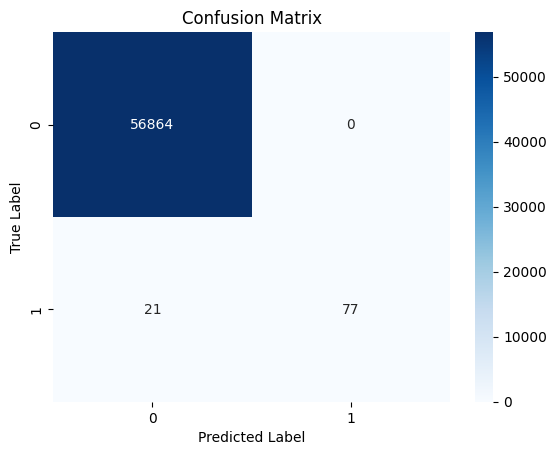

Evaluating model: LogisticRegression
Accuracy: 0.9994
Precision: 0.9428
Recall: 0.8571
F1 Score: 0.8953


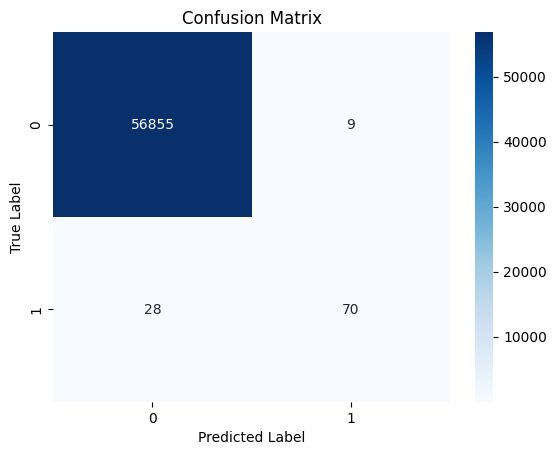

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

y = df['Class']
X = df.drop(columns=['Class'])

X_selected = SelectKBest(score_func=f_classif, k=14).fit_transform(X.copy(), y.copy())

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# CatBoost Classifier with polynomial features
catboost_model_poly = CatBoostClassifier(random_state=42, verbose=False)
catboost_model_poly.fit(X_train_poly, y_train)
y_pred_catboost_poly = catboost_model_poly.predict(X_test_poly)

# Logistic Regression Classifier with polynomial features
logreg_model_poly = LogisticRegression(random_state=42, max_iter=3000)
logreg_model_poly.fit(X_train_poly, y_train)
y_pred_logreg_poly = logreg_model_poly.predict(X_test_poly)

# Evaluate models with polynomial features
evaluate_model(catboost_model_poly, X_test_poly, y_test, y_pred_catboost_poly)
evaluate_model(logreg_model_poly, X_test_poly, y_test, y_pred_logreg_poly)